In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

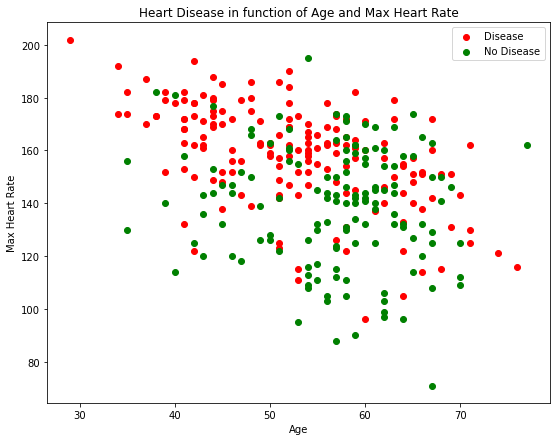

In [9]:
plt.figure(figsize=(9, 7))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="green")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

C:\Users\developer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.score(X_test, y_test)

0.8852459016393442

In [15]:
X_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [16]:
g=model.predict(X_test)

In [17]:
g[0:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [22]:
age      = [int(input("Enter the patient's age                   :"))]
sex      = [int(input("Enter the patient's sex (1-male,0-female) :"))]
cp       = [int(input("Enter the patient's cp (0,1,2,3)          :"))]
trestbps = [int(input("Enter the patient's trestbps              :"))]
chol     = [int(input("Enter the patient's chol                  :"))]
fbs      = [int(input("Enter the patient's fbs (1,0)             :"))]
restecg  = [int(input("Enter the patient's restecg (1,0)         :"))]
thalach  = [int(input("Enter the patient's thalach               :"))]
exang    = [int(input("Enter the patient's exang (1,0)           :"))]
oldpeak  = [float(input("Enter the patient's oldpeak             :"))]
slope    = [int(input("Enter the patient's slope (0,1,2)         :"))]
ca       = [int(input("Enter the patient's ca (0,1,2)            :"))]
thal     = [int(input("Enter the patient's thal (1,2,3)          :"))]
#target   = [int(input("Enter the patient's target :"))]

Enter the patient's age                   :63
Enter the patient's sex (1-male,0-female) :1
Enter the patient's cp (0,1,2,3)          :3
Enter the patient's trestbps              :145
Enter the patient's chol                  :233
Enter the patient's fbs (1,0)             :1
Enter the patient's restecg (1,0)         :0
Enter the patient's thalach               :150
Enter the patient's exang (1,0)           :0
Enter the patient's oldpeak             :2.3
Enter the patient's slope (0,1,2)         :0
Enter the patient's ca (0,1,2)            :0
Enter the patient's thal (1,2,3)          :1


In [19]:
give = {
    'age'      : age,
    'sex'      : sex,
    'cp'       : cp,
    'trestbps' : trestbps,
    'chol'     : chol,
    'fbs'      : fbs,
    'restecg'  : restecg,
    'thalach'  : thalach,
    'exang'    : exang,
    'oldpeak'  : oldpeak,
    'slope'    : slope,
    'ca'       : ca,
    'thal'     : thal
    }
df2 = pd.DataFrame(give)
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


In [30]:
ans=model.predict(df2)
ans

array([1], dtype=int64)

In [31]:
if ans==1:
    print("your condition is not critical")
else:
    print("your condition is critical")

your condition is not critical
